# Project Overview
Lending Club is seeking a data science consultant to conduct thorough data preparation, exploratory data analysis (EDA), and predictive modeling on their loan application dataset. The project aims to deploy a real-time scoring application that will enhance decision-making processes. The primary goals are to:

1. Refine the dataset to ensure its readiness for detailed analysis and modeling.
2. Analyze key factors that influence loan approval outcomes.
3. Develop a predictive model to classify loan applicants and determine their eligibility.
4. Implement a loan approval to aid immediate decision on loan
 
This initiative will enable Lending Club to make informed, data-driven decisions regarding loan approvals and improve operational efficiency.

## [Dataset Description](https://drive.google.com/drive/folders/1FprchXNqTJYgSx8sACcRz6mh1AZAdtrD?usp=sharing)
The dataset consists of loan application records stored in a CSV file at the following path: `data/1-raw/lendingclub-2007-2020Q3Loan_status_2007-2020Q3-100ksample.csv`. The dataset contains various attributes such as applicant information, loan details, financial metrics, and application status. A data dictionary is provided at the following path: `data/1-raw/ lending-club-2007-2020Q3/LCDataDictionary.xlsx`.

**List of important variables**

The dataset contains a total of 143 features, which is quite large for effective analysis. Including all of them may lead to **overfitting** and **increased computational costs** without significantly improving model performance. Based on our problem statement, we have selected 21 key features that are most relevant for performing Exploratory Data Analysis (EDA). These selected features offer valuable insights into patterns and trends that influence loan approval decisions. 

The variables are chosen based on borader categorization noted for loan aproval. They are -- **Borrower's credit history**, **Financial Stability/Collateral**, **Employment and Income Verification**, **Loan Performance Metrics**, **Existing Debt and Liabilities** and **Loan Purpose and Type**

**Borrower's credit history**
- `fico_range_high and fico_range_low` – Borrower’s FICO scores
- `pub_rec_bankruptcies` – Number of bankruptcies recorded. 

**Financial Stability/Collateral**
- `annual_inc` – Borrower’s self-reported annual income. 
- `dti` – Debt-to-income ratio (lower is better).        
- `home_ownership` – Indicates if the borrower owns a home (MORTGAGE, RENT, OWN).
- `loan_amnt` – The amount of loan requested.             
- `installment` – The monthly payment amount.            

**Employment and Income Verification**
- `emp_length` – Employment length in years (stability in employment matters).
- `verification_status` – Whether the income is verified (Verified, Source Verified, Not Verified).
- `application_type` - Individual application or a joint application 

**Loan Performance Metrics**
- `loan_status` – Current loan status (Fully Paid, Charged Off, Late, Default). 

**Existing Debt and Liabilities**
- `total_acc` – Total number of credit lines.
- `open_acc` – Number of open credit lines.
- `max_bal_bc` – Maximum current balance on all revolving accounts.
- `bc_util` – Ratio of total balance to credit limit for bankcard accounts.
- `pub_rec_bankruptcies`- Number of public record bankruptcies


**Loan Purpose and Type**
- `purpose` – The reason for taking the loan (e.g., credit card debt consolidation, home improvement).
- `term` – Number of months for loan repayment (36 or 60 months).
- `int_rate` – The interest rate assigned to the loan.
- `grade` – Loan grade assigned by Lending Club.

## [Data cleaning](https://nbviewer.org/github/hisaylama/DSF_Lending_Club_Predictions/blob/main/Data_cleaning.ipynb)
To identify the important variables we used our business intution and some preliminary statistical analysis. For details check the notebook named `Data_cleaning.ipynb`.

**Summary**:
We have saved the cleaned dataset in `.csv` format. This file will serve as our reference for future exploratory data analysis and model development tasks. 

Saved filename: `cleaned_lending_dataset.csv`

## [Exploratory data analysis (EDA)](https://nbviewer.org/github/hisaylama/DSF_Lending_Club_Predictions/blob/main/Exploratory_data_analysis.ipynb)
Check the Jupyter notebook named `Exploratory_data_analysis.ipynb`, for more details. The key details are summarized here:

**Summary:**
1. Data visualization with categorical variables as a function of loan amount
2. Performed feature engineering and added variables: `fico_score`, `loan_income_ratio`, `loan_term_ratio`, `bc_util_flaf`
3. Extracting insights from statistical patterns: numerical and categorical plots both were discussed.
4. Removing outliers to reduce bias and improve inference quality: capped at 95th percentile
5. Identifying key variables that influence loan approval decisions
6. Saved the new dataset wtih name `EDA_cleaned_lending_dataset.csv`

## [Building predictive model](https://nbviewer.org/github/hisaylama/DSF_Lending_Club_Predictions/blob/main/Predictive_model.ipynb)
Check the model named `Predictive_model.ipynb`, for more details. The key details are summarized here:

**Summary:**
1. Applying one-hot encoding to transform categorical variables into numerical format
2. Preparing training and test datasets
3. Model building 
4. Model Evaluation based on evaluation metrics
5. Saved the model  as name `baseline_model_1.pkl` and `baseline_model_2.pkl`
   
In my view, the model is performing well for the given features. However we can imporve the model using artificial neural network ANN.





### **Rationale for model selection**

Based on our Exploratory Data Analysis (EDA), the `loan_status` variable emerges as a pivotal indicator of loan approval outcomes. It encapsulates essential information regarding loan performance and credit risk, rendering it an ideal choice for the **target variable** in our predictive modeling efforts.

The remaining variables in the dataset will serve as **input features** or **independent variables**, providing the necessary context to predict the `loan_status`.

Given that `loan_status` comprises two distinct categories—"Default" and "Not-Default"—the problem is inherently a **binary classification task**. This classification framework enables the application of various machine learning algorithms, such as Random Forests, or Gradient Boosting Machines, to develop a model capable of accurately forecasting loan approval decisions.

By framing the problem in this manner, we can leverage supervised learning techniques to train a model that predicts the likelihood of a loan default, thereby aiding in risk assessment and decision-making processes.

## [Model deployment](https://nbviewer.org/github/hisaylama/DSF_Lending_Club_Predictions/blob/main/Model_deployment.ipynb)

We prepare the notebook (`Model_deployment.ipynb`)for the user to make a decision on whether the loan should be approved or not. 

**Requirements to run the predictive model:**

- Input values : To make the predictions following information about the loan applciants are mandatory. Whenever you run first snippet, you’ll be prompted to enter the required numeric value.

| Order | Column Name                |    | Description                                                       | Example Range/Value |
|-------|----------------------------|------------------|-------------------------------------------------------------------|---------------------|
| 1     | **fico_score_capped**      |         | Borrower’s FICO score; reflects payment history & utilization     | 500 (300–850)       |
| 2     | **pub_rec_bankruptcies**   |        | Number of recorded bankruptcies                                   | 0 – 100             |
| 3     | **total_acc**              |       | Total number of credit lines; indicates credit mix & age          | 2 – 110             |
| 4     | **high_util_flag**         |         | Credit utilization flag: 0 if > 75% of limit used, else 1         | 0 or 1              |
| 5     | **annual_inc_capped**      |          | Borrower’s self‑reported annual income, gauges repayment ability  | Numeric USD value  |
| 6     | **dti_capped**             |          | Debt‑to‑income ratio; measures cash‐flow coverage                  | < 100               |
| 7     | **term_numeric**           |       | Loan repayment term in months                                     | 36 or 60            |
| 8     | **int_rate_numeric_capped**|     | Assigned interest rate (%)                                        | 5 – 30%             |
| 9     | **loan_amnt_capped**       |      | Amount of loan requested (USD)                                    | Numeric USD value  |
| 10    | **loan_income_ratio**      |        | Loan amount divided by annual income                              | ≈ 10                |
| 11    | **loan_term_ratio_capped** |        | Loan amount to installment ratio                                  | ≈ 10                |

- Load model: Here, `baseline_model_1.pkl` model to make the decisions on loan approval

    - **When the model predicts 0 or False**, -- **Loan can be approved!** 
    - **When the model predicts 1 or True**, --  **Loan cannot be approved!**


**Summary**:

This demonstration shows how the model, after prompting the user to enter a set of numeric inputs, predicts the loan outcome. It then outputs a decision on whether the loan is approved or denied.

## Limitations of XGB classifier and RF classifier model used for our analysis
- **Resource intensity:** Computational complexeity, both algorithms demand substantial compute power and memory, resulting in slower inference on large datasets.  
- **Model transparency:** Their ensemble nature makes them “black boxes,” complicating the generation of transparent, regulatory‑compliant explanations.  
- **Imbalanced‑data challenges & extrapolation:** They struggle with skewed default rates and cannot reliably predict outcomes beyond the scope of the training data.  


**A Potential Remedy**  
Adopting a neural‑network–based architecture may alleviate some of these drawbacks, though it typically necessitates much larger volumes of training data.
Use neural network based architecture, however, it requires the large datsets

## Considerations on deployment and scalability 
How will the model be used in Business As Usual(BAU) by the business?


We used model - Random Forest and XGBoost classifiers, these models are well-suited for scalable, production-grade deployment in a Business-As-Usual (BAU) setting:

- Both models can be containerized and served via REST or gRPC APIs, enabling seamless integration into existing loan origination platforms.
  
- Model training and version updates can be automated through CI/CD pipelines, ensuring smooth build, validation, and deployment with minimal manual intervention.

- Containerizing the model services (e.g., using Docker) and deploying on orchestration platforms like Kubernetes enables automated scaling to accommodate both real-time traffic demands and batch processing workloads. 

- The models support both **real-time predictions** (for instant loan decisions via frontend integration using `streamlit`) and **batch scoring** (for periodic portfolio risk assessments), offering operational flexibility.



## Estimated impact

Integrating the loan prediction model into a user-friendly front-end interface significantly enhances the loan approval process by providing real-time, data-driven decisions. This integration offers several key benefits:

- **Accelerated decision-making**: Automating the process of evaluating loan applications speeds up the approval process and improves operational efficiency.

- **Enhanced accuracy**: Utilizing machine learning algorithms built in this project (baseline_model_1.pkl and baseline_model_2.pkl ) allows for precise assessment of an applicant's **creditworthiness**, minimizing the risk of default.

- **Improved user experience**: Applicants receive immediate feedback on their loan eligibility.

- **Resource Optimization**: Automating the approval process frees up human resources, and reduces overhead cost.

Furthermore, this predictive model adds significant business value by reducing **operational costs, improving customer satisfaction, and mitigating financial risks**.

## ROI of the project

In LendingClub's framework, Return on Investment (ROI) quantifies the net gain or loss from an investment relative to its cost, expressed as a percentage. For investors, ROI is calculated by considering the interest earned from fully paid loans, subtracting any losses from defaulted loans and operational cost. This metric provides a clear picture of the profitability of investments made through the platform. Return on Investment (ROI) can be mathematically expressed as:

$
\text{ROI (\%)} = \left( \frac{\text{Interest earned} - \text{Amount defaulted} - \text{Operational cost}}{\text{Total amount invested}} \right) \times 100$

Where:

- **Interest earned**: Total interest payments received from fully paid loans.
- **Amount defaulted**: Total principal lost due to borrower defaults.
- **Operational cost**: Operational cost for the LendingClub.
- **Total amount invested**: The total amount of capital invested in loans.

Our model significantly reduces the `amount defaulted` by minimizing credit risk, and it also lowers `operational costs` since the predictive model operates efficiently and can be managed by a single person, thereby reducing employee salary expenses.


### **Model architecture**

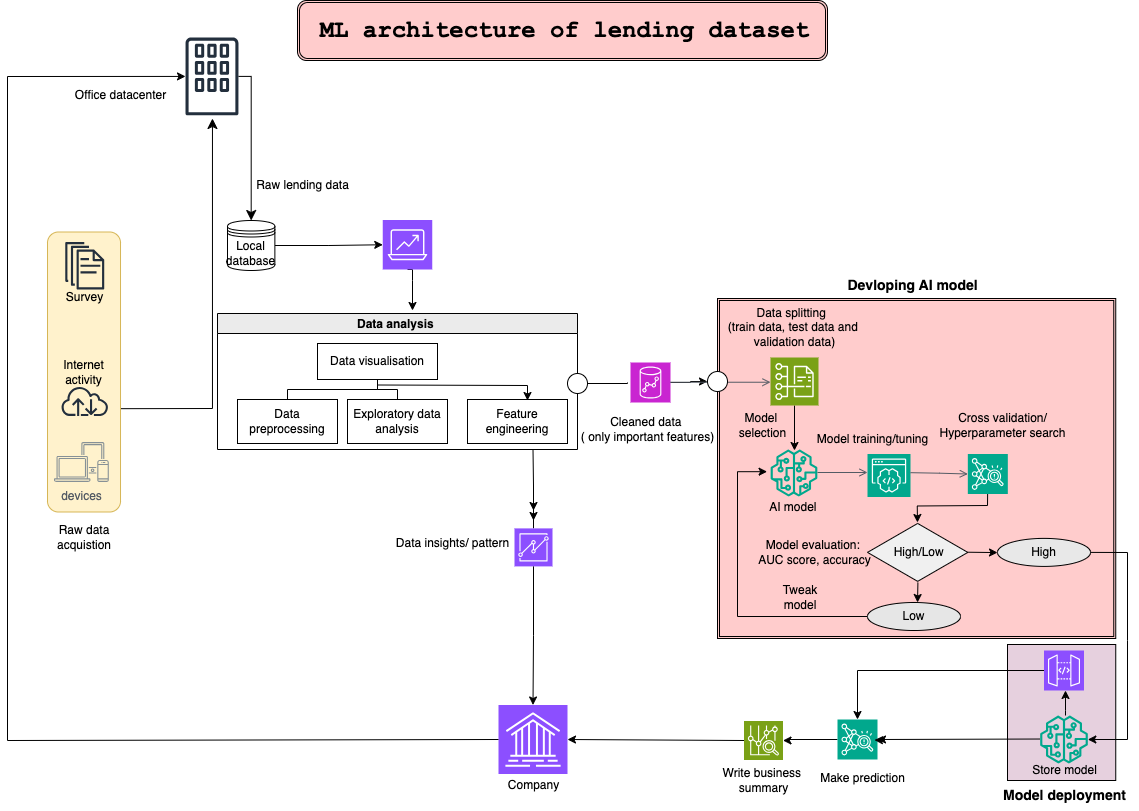


## Example case

- For the following set of values:
    1. Enter capped FICO score (mean of range, e.g. 500):  600
    2. Enter number of bankruptcies recorded (0–100):  1
    3. Enter total number of credit lines (2–110):  3
    4. Enter high utilization flag (0 if utilization >75%, else 1):  0
    5. Enter annual income (USD):  100000
    6. Enter debt-to-income ratio (capped <100):  40
    7. Enter loan term in months (36 or 60):  50
    8. Enter interest rate (%) for the loan (5–30):  20
    9. Enter amount of loan requested (USD):  600000
    10. Enter loan amount/installment ratio (e.g., 10):  18
    11. Enter loan amount/annual income ratio (e.g., 10):  60
        
- ML Model = `loaded_model_pickle_1.pkl` (RandfomForest Classifier model) or `loaded_model_pickle_2.pkl` XGBoost Classifier model)
- Output prompt:
  **Loan cannot be approved!, Confidence (%): 62.4972**

## Final output: 

Predictive model named [baseline_model_2.pkl](https://drive.google.com/file/d/12ckLZoCIUAtmfNgfJb_UREohhWeGjRHZ/view?usp=sharing):  

Model decides on loan approval.

Final output is  **"Loan can be approved!"** or **"Loan cannot be approved!"**
